# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [205]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [206]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-16.1932)


## Sampling from categorical probabilities with given probabilities

In [207]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([0.02, 0.98])))
print(x)

tensor(1)


## Animating data

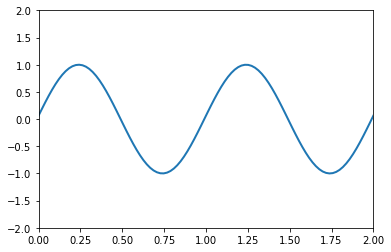

In [208]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 100)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init, frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

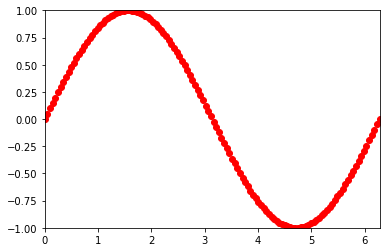

In [211]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
# plt.show()
HTML(ani.to_jshtml())

## Drawing histogram

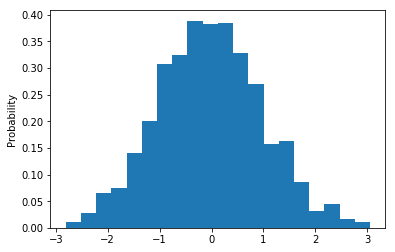

In [210]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=20)
plt.ylabel('Probability');

## Task 1

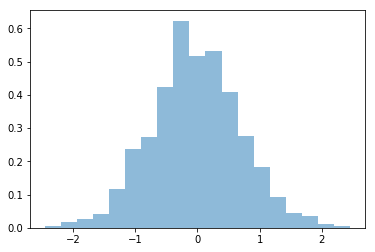

In [225]:
mean, variance = 0, 0.7
size = 10000

def generate_numbers(mean, var, size):
    x = []
    for i in range(size):
        x.append(pyro.sample("normal_sampling", pyro.distributions.Normal(mean, var)))
    return x
        
x = generate_numbers(mean, variance, size)
fig, ax = plt.subplots()

def update(frame, var):
    if frame <=2: 
        return
    ax.clear()
    ax.hist(x[:int(frame*frame/2) + 1], density=True, bins=np.linspace(-3.5*var, 3.5*var, num=20), alpha=0.5)
#     ax.set_ylim(0, 1)

simulation = animation.FuncAnimation(fig, update, frames=50, fargs=(variance,), repeat=False)
HTML(simulation.to_jshtml())

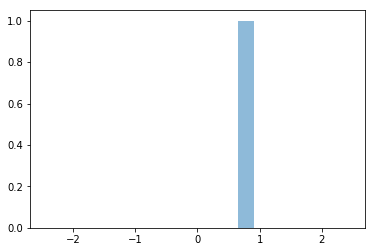

In [226]:
mean, variance = 0, 0.7
size = 10000

x = np.random.normal(mean, variance, size+1)
fig, ax = plt.subplots()

def update(frame, var):
    ax.clear()
    ax.hist(x[:int(frame*frame/2) + 1], density=False, bins=np.linspace(-3.5*var, 3.5*var, num=20), alpha=0.5)
#     ax.set_ylim(0, 1)

simulation = animation.FuncAnimation(fig, update, frames=50, fargs=(variance,), repeat=False)
HTML(simulation.to_jshtml())

Traceback (most recent call last):
  File "C:\Users\Marta\Anaconda3\envs\puma\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Marta\Anaconda3\envs\puma\lib\site-packages\matplotlib\animation.py", line 999, in _start
    self._init_draw()
  File "C:\Users\Marta\Anaconda3\envs\puma\lib\site-packages\matplotlib\animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\Marta\Anaconda3\envs\puma\lib\site-packages\matplotlib\animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-251-397556e7a433>", line 9, in update
    x = np.concatenate([x, np.random.normal(mean, var, int(frame*frame/2) + 2 - x.shape[0])])
  File "mtrand.pyx", line 1652, in mtrand.RandomState.normal
  File "mtrand.pyx", line 242, in mtrand.cont2_array_sc
ValueError: negative dimensions are not allowed


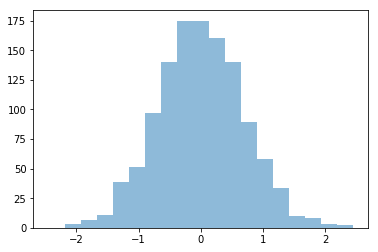

In [251]:
mean, variance = 0, 0.7
size = 10000

x = np.random.normal(mean, variance, 1)
fig, ax = plt.subplots()

def update(frame, mean, var):
    global x
    x = np.concatenate([x, np.random.normal(mean, var, int(frame*frame/2) + 2 - x.shape[0])])
    ax.clear()
    ax.hist(x, density=False, bins=np.linspace(-3.5*var, 3.5*var, num=20), alpha=0.5)
#     ax.set_ylim(0, 1)

simulation = animation.FuncAnimation(fig, update, frames=50, fargs=(mean, variance,), repeat=False)
HTML(simulation.to_jshtml())

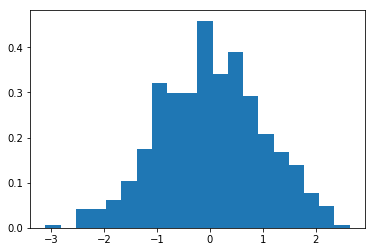

In [214]:
x = np.random.normal(size = 500)
res = plt.hist(x, density=True, bins=20)

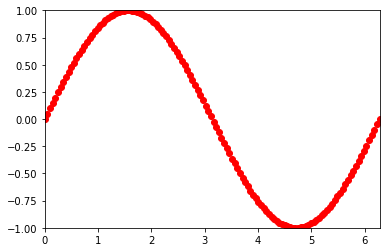

In [12]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), init_func=init, blit=True)
HTML(ani.to_jshtml())

## Task 2

2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation

In [117]:
people_to_test = 50000
false_positive = 0.02  # 2%
false_negative = 0.01  # 1%

In [253]:
def run_test(people_ill, people_to_test, fp, fn):
    tr_pos, tr_neg, fal_pos, fal_neg = 0, 0, 0, 0  # counters for people who are true positive, true negative etc.
    
    for p in range(people_to_test):
        if p < people_ill:                         # people who are really ill
            if pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([fn, 1-fn]))) > 0:
                tr_pos += 1
            else:
                fal_neg += 1
        else:                                      # people who are healthy
            if pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([fp, 1-fp]))) > 0:
                tr_neg += 1
            else:
                fal_pos += 1
                
    return tr_pos, tr_neg, fal_pos, fal_neg


def experimental_true_illness_prob(tr_pos, fal_pos):
    return tr_pos / (tr_pos + fal_pos)


def bayes_true_illness_prob(people_ill, people_to_test, fp, fn):
    prob_of_illness = people_ill / people_to_test
    return (1-fn) * prob_of_illness / ((1-fn) * prob_of_illness + fp * (1-prob_of_illness))

In [254]:
people_ill = np.random.randint(1, 101)
true_pos, true_neg, false_pos, false_neg = run_test(people_ill, people_to_test, false_positive, false_negative)

print(people_ill)
print(true_pos, true_neg, false_pos, false_neg)

64
62 48912 1024 2


In [255]:
experiments = experimental_true_illness_prob(true_pos, false_pos)
bayes = bayes_true_illness_prob(people_ill, people_to_test, false_positive, false_negative)

print(f'Experimental probability: {experiments*100:.3f}%')
print(f'Bayes probability: {bayes*100:.3f}%')

Experimental probability: 5.709%
Bayes probability: 5.966%


In [200]:
fn = 0.01
ones = 0
for i in range(10000):
    if pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([fn, 1-fn]))) > 0:
        ones += 1
        
print(f'{ones} / 10000')

9911 / 10000


## Multiple experiments

In [279]:
people_to_test = 50000
min_ill, max_ill = 1, 100
false_positive = 0.02      # 2%
false_negative = 0.01      # 1%

experiments = [[] for i in range(max_ill)]
bayes = []

n = 1
for p in range(min_ill, max_ill+1):
    bayes.append(bayes_true_illness_prob(p, people_to_test, false_positive, false_negative))
    for i in range(n):
        tp, tn, fp, fn = run_test(p, people_to_test, false_positive, false_negative)
        experiments[p-1].append(experimental_true_illness_prob(tp, fp))
#     print('People ill -', p)
        
# with open("experiments.txt", "wb") as f:
#     pickle.dump(experiments, f)

In [267]:
# print(experiments)
# print(bayes)

with open("experiments.txt", "rb") as f:
    e = pickle.load(f)
    
with open("bayes.txt", "rb") as f:
    b = pickle.load(f)

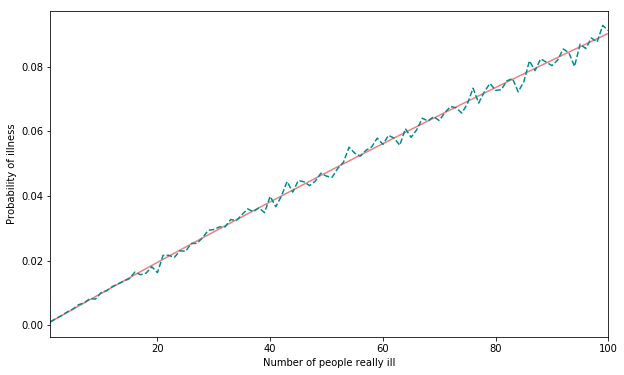

In [277]:
experiment = [sum(i)/len(i) for i in experiments]
x = range(1, len(experiment)+1)

plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(x, bayes, '-', color='lightcoral')
plt.plot(x, experiment, '--', color='darkcyan')
plt.xlabel('Number of people really ill')
plt.ylabel('Probability of illness')       # for people who had positive test result
plt.xlim(min_ill, max_ill)
plt.show()

In [188]:
with open("experiments.txt", "rb") as f:
    e = pickle.load(f)